# Option Learning experiment

This notebook reproduces the Option Learning experiment from the STOMP paper.

## TwoRooms

As in the implementation from the paper, the TwoRooms environment has 72 states, the 72 non-terminal grid cells.

In [ ]:
""" Imports """
import numpy as np

from gridworld.gridworld import GridWorld
from gridworld.room_design import stomp_four_room_design, stomp_two_room_design
from stomp.framework import STOMP


In [3]:
""" Experiment Parameters """

runs = 1
number_of_steps = 50000
subgoal_state_idx = 30  # this is the hallway state in the TwoRooms
subgoal_idx = 0

env = GridWorld(room_array=stomp_two_room_design)

env.num_states


72

In [4]:
""" Run Experiment """

# Store statistics
many_initial_state_estimatives = np.zeros((runs, number_of_steps))
many_rmse_of_states = np.zeros((runs, number_of_steps))

for i in range(runs):
    print(f"Run {i + 1}/{runs}")

    env.reset()
    _stomp = STOMP(
        env=env,
        subgoal_states_info={subgoal_state_idx: (7, 3)},  # hallway state position in the grid
    )

    # Local access to option learning
    option_learning = _stomp.option_learning

    initial_state_estimative, rmse_of_states = option_learning.learn_options(
        subgoal_idx, number_of_steps, return_rmse=True
    )

    # Store results
    many_initial_state_estimatives[i] = initial_state_estimative
    many_rmse_of_states[i] = rmse_of_states


Run 1/1


100%|██████████| 50000/50000 [00:22<00:00, 2202.84it/s]


In [5]:
""" Save model """
from common.utils import save_model

w_option = _stomp.stomp_foundation.w_subgoal[subgoal_idx]
theta_option = _stomp.stomp_foundation.theta_subgoal[subgoal_idx]

save_model(w_option, "w_reward_respecting_hallway_option.npy")
save_model(theta_option, "theta_reward_respecting_hallway_option.npy")

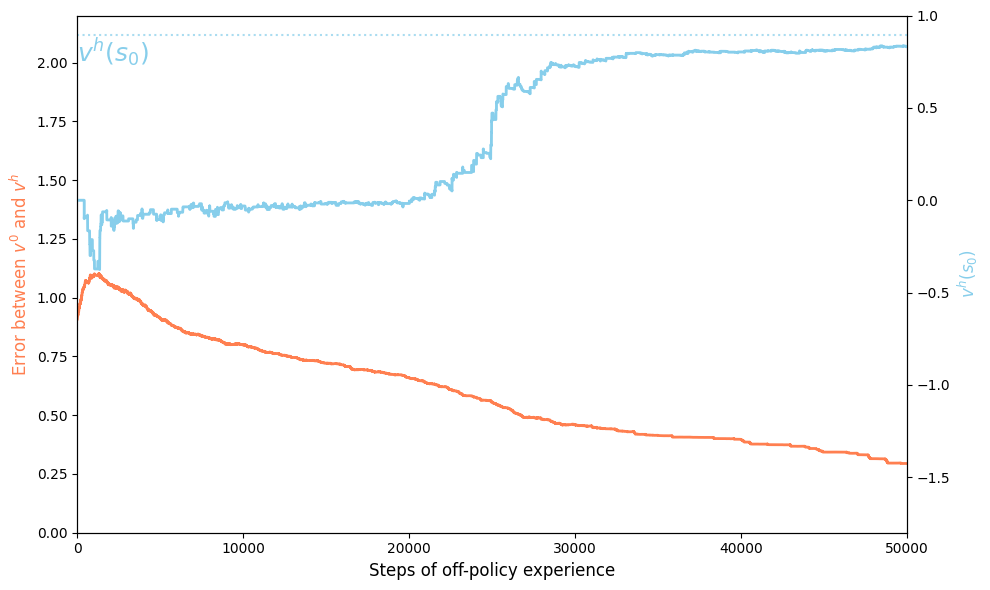

In [6]:
""" Plot the results """

import matplotlib.pyplot as plt

# Calculate the averages
average_v_s0 = np.mean(many_initial_state_estimatives, axis=0)
average_rmse = np.mean(many_rmse_of_states, axis=0)

stddev_v_s0 = np.std(many_initial_state_estimatives, axis=0)
stddev_rmse = np.std(many_rmse_of_states, axis=0)


# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis (left y-axis) for error (red)
ax1.set_xlabel('Steps of off-policy experience', fontsize=12, color='black')
ax1.set_ylabel('Error between $v^0$ and $v^h$', color='coral', fontsize=12)
ax1.plot(range(number_of_steps), average_rmse, color='coral', linewidth=2)
# ax1.fill_between(
#     range(number_of_steps),
#     average_rmse - stddev_rmse,
#     average_rmse + stddev_rmse,
#     color='coral',
#     alpha=0.3
# )
ax1.tick_params(axis='y', labelcolor='coral')
ax1.set_xlim(0, number_of_steps)
ax1.set_ylim(0, 2.2)
ax1.grid(False)

# Secondary axis (right y-axis) for value function (blue)
ax2 = ax1.twinx()
ax2.set_ylabel('$v^h(s_0)$', color='skyblue', fontsize=12)
ax2.plot(range(number_of_steps), average_v_s0, color='skyblue', linewidth=2)
ax2.fill_between(
    range(number_of_steps),
    average_v_s0 - stddev_v_s0,
    average_v_s0 + stddev_v_s0,
    color='skyblue',
    alpha=0.3
)
ax2.tick_params(axis='y', labelcolor='skyblue')
ax2.set_ylim(-1.8, 1)
ax2.grid(False)

# Add a horizontal dotted line for reference
ax2.axhline(y=0.895, color='skyblue', linestyle='dotted', alpha=0.7)
ax2.text(0, 0.75, "$v^h(s_0)$", color='skyblue', fontsize=18)

# Style the plot
for spine in ax1.spines.values():
    spine.set_color('black')
for spine in ax2.spines.values():
    spine.set_color('black')

ax1.tick_params(colors='black')
ax2.tick_params(colors='black')
ax1.xaxis.label.set_color('black')

plt.tight_layout()
plt.show()


## FourRooms

The FourRooms domain is a larger gridworld and is composed of 103 stated, being four of them hallway states. The experiments in FourRooms assume a stochasticity with actions moving to the expected direction with probability 2/3, and in one of the other three with probability 1/9. 

103


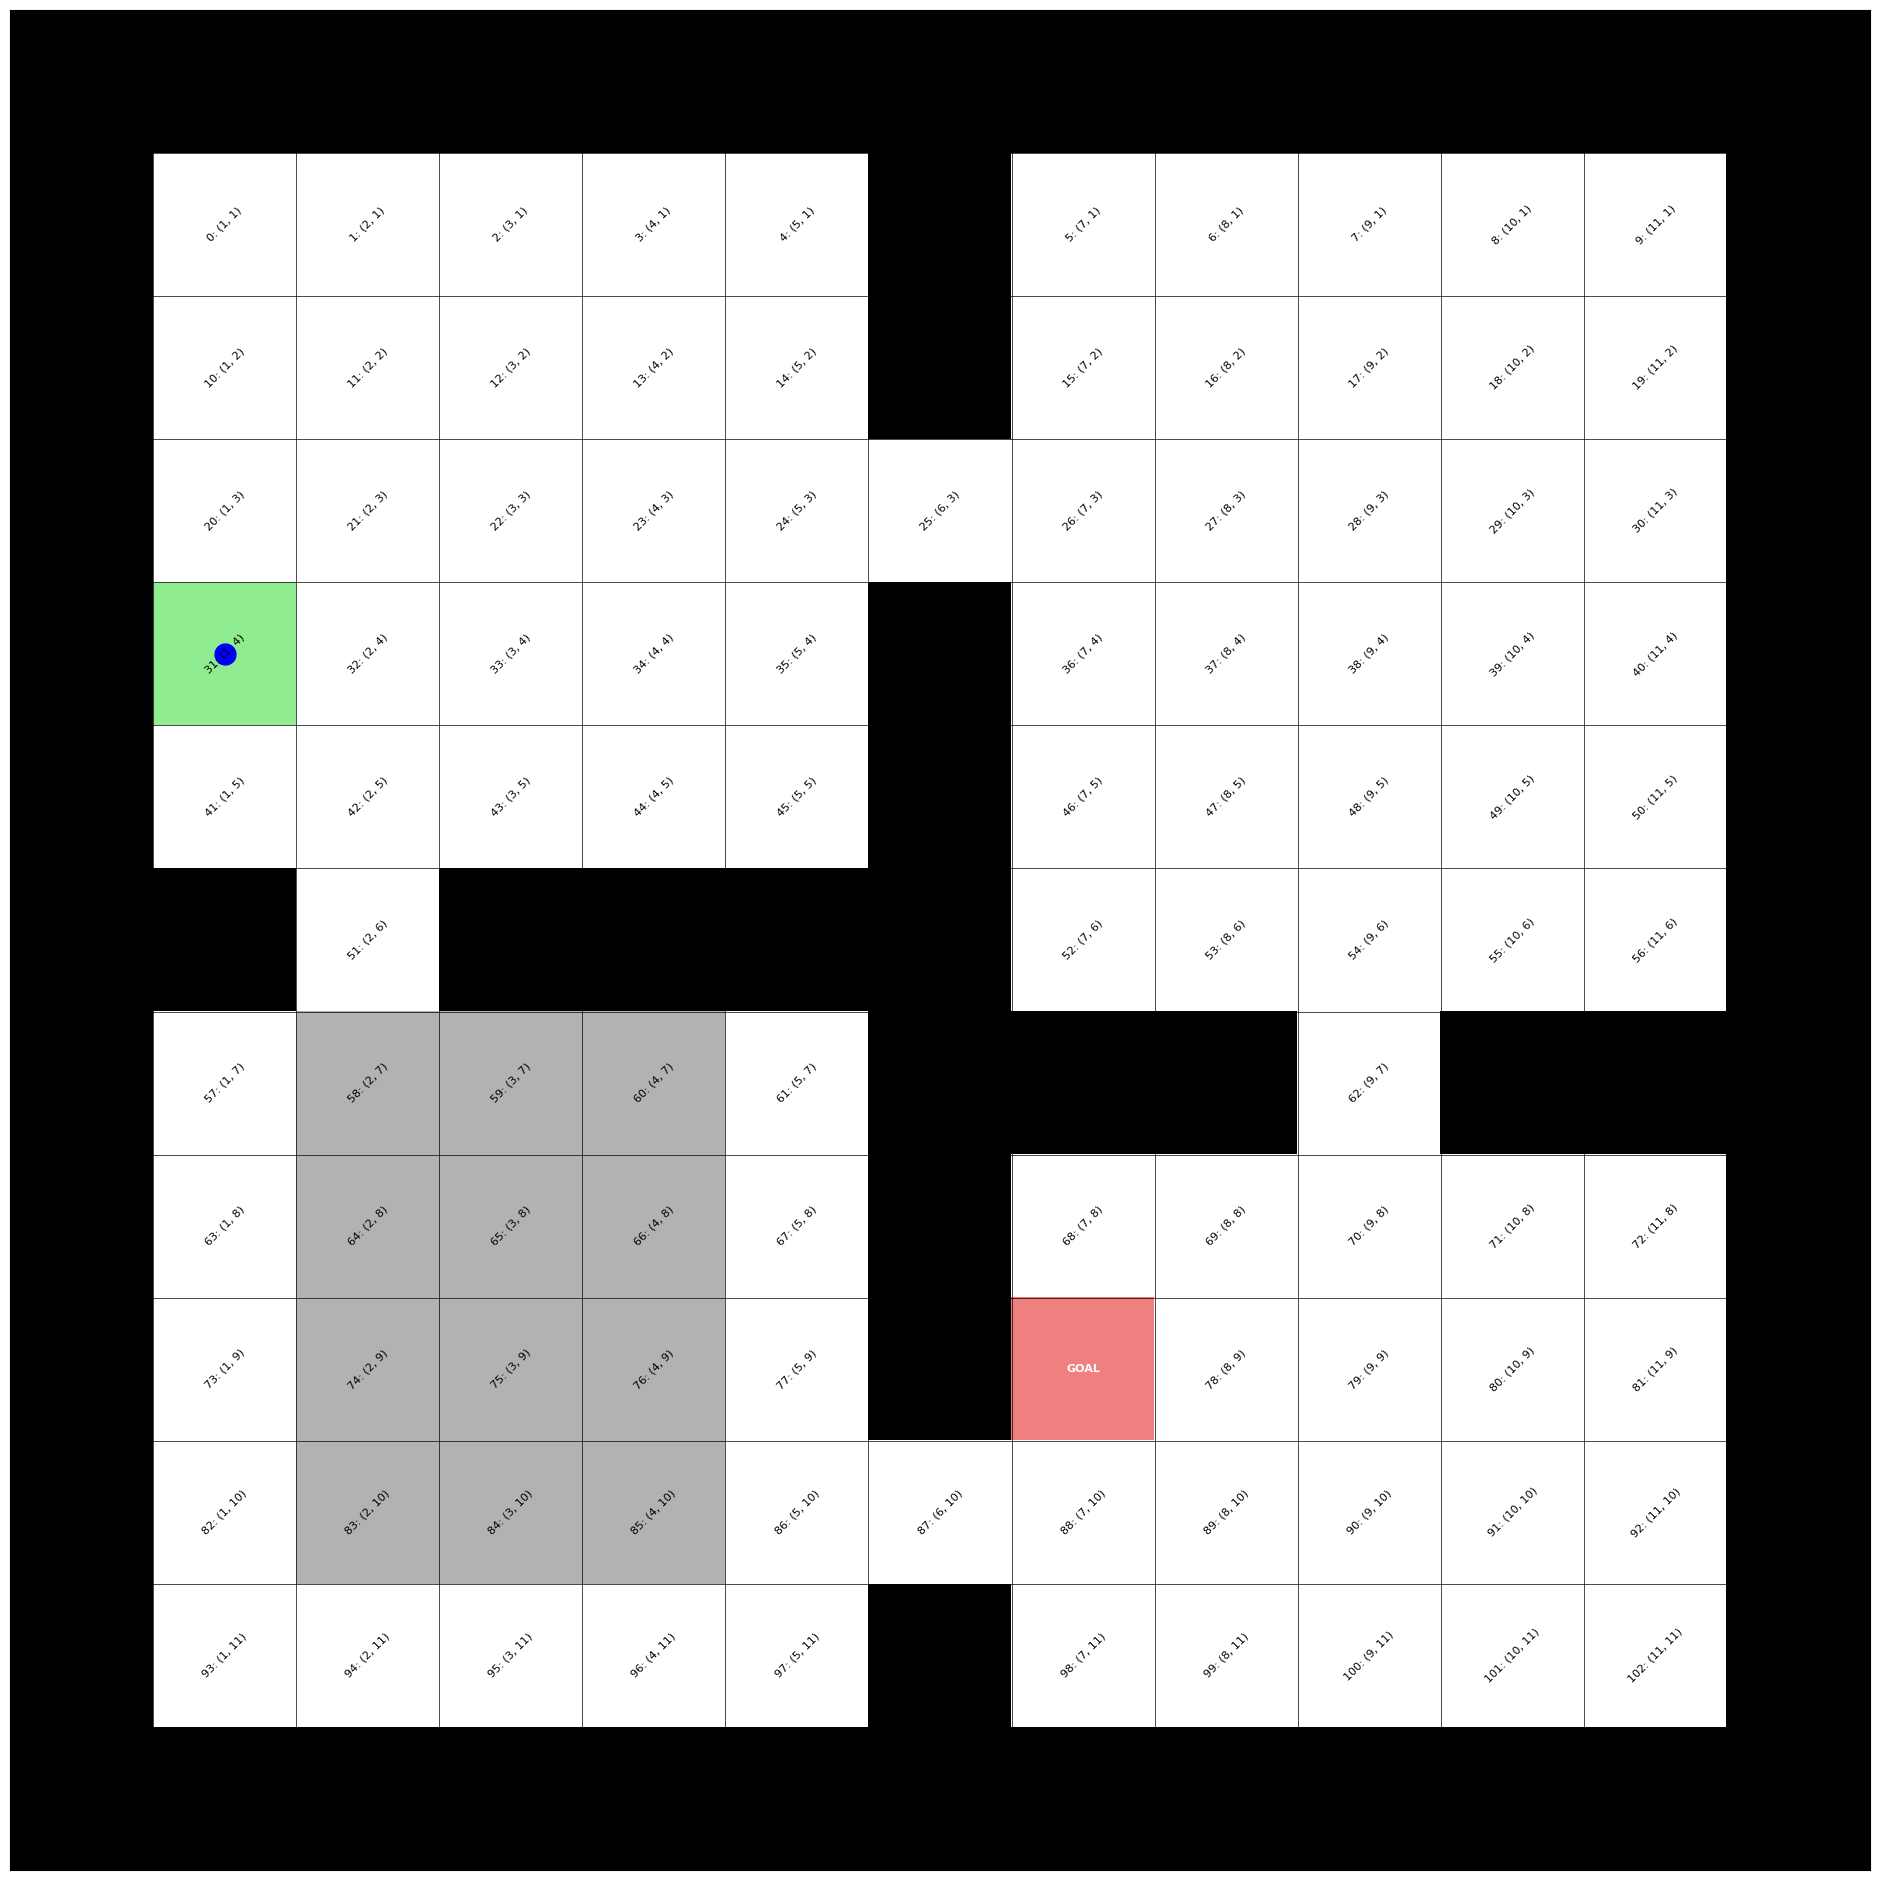

In [ ]:
""" Experiment Parameters """

runs = 1
number_of_steps = 200_000
subgoal_state_idx = []
subgoal_idx = [0,1,2,3]

env = GridWorld(room_array=stomp_four_room_design)

print(env.num_states)

env.plot_room_with_states()